## TF-IDF using real example ( E-commerce text dataset)

In [1]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv('e-commerce.csv')

In [3]:
data = data.rename(columns={'Household': 'label'})

In [4]:
data.head()

,label,text
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


In [5]:
# Get value counts
value_counts = data['label'].value_counts()
value_counts

Household                 19312
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: label, dtype: int64

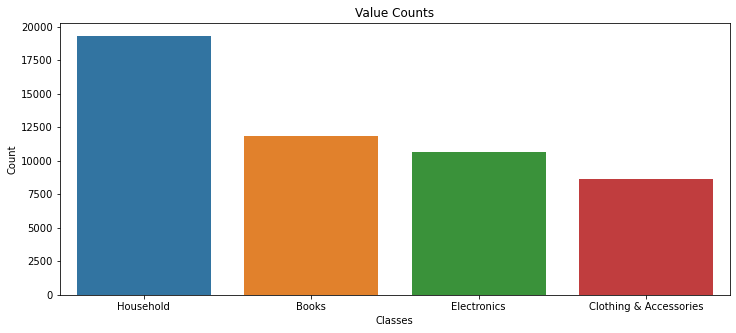

In [6]:
fig = plt.figure(figsize = (12,5))
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Value Counts')
plt.show()

In [7]:
data['target'] = data['label'].map({
    'Household' : 0,
    'Books' : 1,
    'Electronics' : 2,
    'Clothing & Accessories' : 3
})

In [8]:
data.head()

,label,text,target
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",0
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,0
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",0
3,Household,Incredible Gifts India Wooden Happy Birthday U...,0
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...,0


In [9]:
data.isna().sum()

label     0
text      1
target    0
dtype: int64

In [10]:
data = data.dropna()

In [11]:
data.isna().sum()

label     0
text      0
target    0
dtype: int64

In [13]:

X, y = data.text, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with TfidfVectorizer and MultinomialNB
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),  # TfidfVectorizer for text representation
    ('knn',  KNeighborsClassifier())    # Multinomial Naive Bayes as the model
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline on the training data
text_clf.fit(X_train, y_train)

# Predict on the test set
predicted = text_clf.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, predicted, average = 'weighted')
print(f"F1 Score: {f1}")

F1 Score: 0.9587118955039478
